In [392]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict 

In [393]:
data = pd.read_csv(r"C:\Users\Administrator\Desktop\train.csv")
data_test = pd.read_csv(r"C:\Users\Administrator\Desktop\test.csv")
da = data.copy()

# 简单查看

In [394]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [395]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [396]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [397]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [398]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [399]:
data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# 处理各变量

### 0.去除无关变量

In [400]:
data = data.drop(['PassengerId','Name','Ticket'],axis = 1)

### 1.sex

In [401]:
# 字符字段，应该转为数字编码
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
sex = data["Sex"]
sex = LE.fit_transform(sex)
data["sex"] = sex
data = data.drop(["Sex"],axis = 1)
data["sex"].value_counts()

1    577
0    314
Name: sex, dtype: int64

#### 2.Age

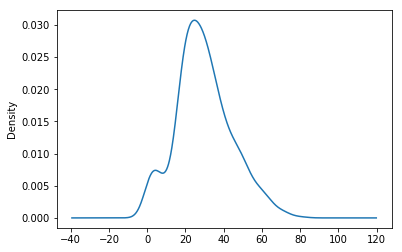

In [402]:
# 查看
from scipy import stats
data["Age"].plot(kind = "kde")
# 正态性检验
#c = data["Age"].dropna()
#print("是否正态:",stats.normaltest(c).pvalue>0.05)

In [403]:
# 处理缺失值
c = data["Age"].fillna(data["Age"].median())
data["age"] = c
data = data.drop(["Age"],axis = 1)

#### 3.Fare

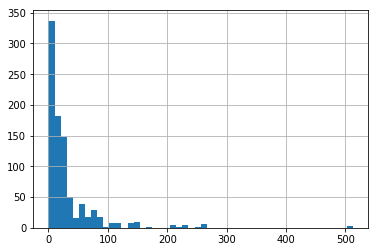

In [404]:
data["Fare"].hist(bins = 50)
# 归一化处理（非正态）
data["fare"] = data["Fare"] /(data["Fare"].max() - data["Fare"].min())
data = data.drop(["Fare"],axis = 1)

#### 4.Embarked

In [405]:
data["Embarked"] = data["Embarked"].fillna("S")

In [406]:
from sklearn.preprocessing import LabelEncoder
LEE = LabelEncoder()
EB = data["Embarked"]
EB = LEE.fit_transform(EB.astype(str))
data["EB"] = EB
data = data.drop(["Embarked"],axis = 1)

In [407]:
data["EB"].value_counts()

2    646
0    168
1     77
Name: EB, dtype: int64

In [420]:
data = data.drop(["Cabin"],axis = 1)

In [421]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
sex         891 non-null int64
age         891 non-null float64
fare        891 non-null float64
EB          891 non-null int64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [439]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
data1 = data["Survived"]
data2 = data.drop(["Survived"],axis = 1)
LR.fit(data2,data1)
c = LR.predict(data2)
LR.score(data2,data1)

0.8002244668911336